## **Assignment 0**

This assignment is a self-directed study to introduce you to the basics of Python for computer vision. There is nothing to hand in and no marks will be given.


(640, 480) RGB PNG


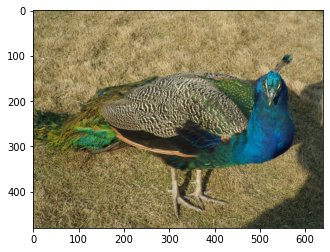

In [ ]:
# import the packages we need for this assignment
from PIL import Image
import numpy as np

# open the test image
# Note: If you didn't launch Python from the same directory where you saved
#       the file, peacock.png, you'll need to provide the full path name as
#       the argument to Image.open
im = Image.open('peacock.png')

# display relevant Image class attributes: dimensions (width, height),
# pixel format and file format
#
# Python 2 version
#     print im.size, im.mode, im.format
# Python 3 version
print(im.size, im.mode, im.format)

# Note: PIL does not have a built-in image display tool.  Instead, principally
# for debugging, there's a show method which saves an image to a temporary file
# on disk and calls a platform dependent external display utility
# (the default being "xv" on unix, and the "Paint" program on Windows).

# display the image
# im.show()

# if this does not work on your system, try the imshow function from
# matplotlib's pyplot module by uncommenting the next three lines
import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()




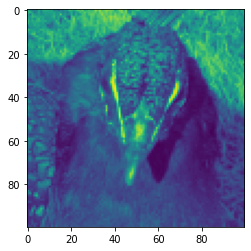

In [ ]:
# convert the image to a black and white "luminance" greyscale image
im = im.convert('L')

# select a 100x100 sub region (containing the peacock's head)
im2 = im.crop((475,130,575,230))

# save the selected region
im2.save('peacock_head.png','PNG')
plt.imshow(im2)
plt.show()

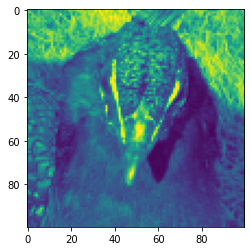

In [ ]:
# PIL and numpy use different internal representations
# convert the image to a numpy array (for subsequent processing)
im2_array = np.asarray(im2)

# compute the average intensity
average = np.mean(im2_array)

# Note: we need to make a copy to change the values of an array created using
# np.asarray
im3_array = im2_array.copy()

# add 50 to each pixel value (clipping above at 255, the maximum uint8 value)
# Note: indentation matters
for x in range(0,100):
  for y in range(0,100):
    im3_array[y,x] = min(im3_array[y,x] + 50, 255)

# convert the result back to a PIL image and save
im3 = Image.fromarray(im3_array)
im3.save('peacock_head_bright.png','PNG')
plt.imshow(im3)
plt.show()

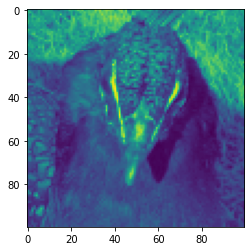

In [ ]:
# again make a copy of the (original) 100x100 sub-region
im4_array = im2_array.copy()

# this time, reduce the intensity of each pixel by half
# Note: this converts the array to a float array
im4_array = im4_array * 0.5

# convert the array back to a unit8 array so we can write to a file
im4_array = im4_array.astype('uint8')

# convert the numpy array back to a PIL image and save
im4 = Image.fromarray(im4_array)
im4.save('peacock_head_dark.png','PNG')
plt.imshow(im4)
plt.show()

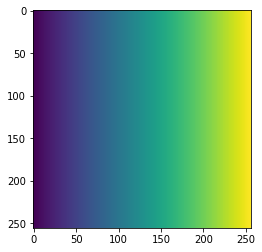

In [ ]:
# let's generate our own image, a simple gradient test pattern
# make a 1-D array of length 256 with the values 0 - 255
grad = np.arange(0,256)

# repeat this 1-D array 256 times to create a 256x256 2-D array
grad = np.tile(grad,[256,1])

# convert to uint8 and then to a PIL image and save
im5 = Image.fromarray(grad.astype('uint8'))
im5.save('gradient.png','PNG')
plt.imshow(im5)
plt.show()